In [1]:
import pandas as pd               
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.callbacks import History 


import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar, Profiler, ResourceProfiler, visualize
import bokeh.plotting as bp

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

ProgressBar().register()
bp.output_notebook()

history = History()
history_testing = History()

/Users/sgez/bin/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/sgez/bin/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Loading BokehJS ...

In [2]:
df_init = df = pd.read_csv('maintenance_data.csv')

msk = np.random.rand(len(df)) < 0.8

#Convert strings to discreat integers
try:
    df.replace('TeamA',1, inplace=True)
    df.replace('TeamB',2, inplace=True)
    df.replace('TeamC',3, inplace=True)
    df.replace('Provider1',1, inplace=True)
    df.replace('Provider2',2, inplace=True)
    df.replace('Provider3',3, inplace=True)
    df.replace('Provider4',4, inplace=True)
except:
    pass  


X = df.drop('broken', axis=1).values
Y = df.broken.values[np.newaxis].T

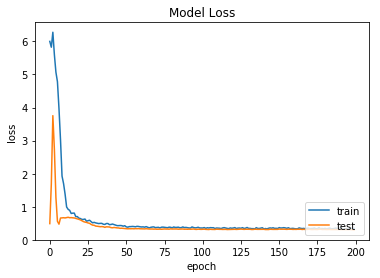

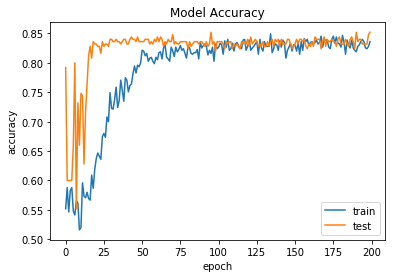

In [3]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=6))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
with Profiler() as prof, ResourceProfiler() as rprof:
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    model.fit(X, Y, epochs=200, verbose=0, validation_split=0.25, callbacks=[history])
visualize([rprof])

#Loss during training epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#Accuracy during training epochs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()